# Logistic Regression Project 

## Import Libraries

**Importing a few libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Reading in the Autism_Data_For_All_Ages.csv file and setting it to a data frame called autism_df.**

In [2]:
autism_df = pd.read_csv('Autism_Data_For_All_Ages.csv')

**Checking the head of autism_df**

In [3]:
autism_df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,User,Class
0,1,0,1,1,0,0,1,1,0,0,...,m,middle eastern,yes,no,Libya,no,5,4-11 years,parent,NO
1,3,0,1,1,1,1,1,1,0,0,...,m,middle eastern,yes,no,Libya,yes,7,4-11 years,parent,YES
2,4,0,1,1,1,1,1,0,1,1,...,m,white,no,no,Russia,no,8,4-11 years,parent,YES
3,8,0,1,1,0,1,1,1,0,0,...,m,middle eastern,yes,no,Libya,no,5,4-11 years,parent,NO
4,9,0,0,1,1,1,1,0,1,0,...,m,white,no,no,Russia,no,6,4-11 years,parent,NO


**Using info and describe() on autism_df**

In [4]:
autism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 22 columns):
Case No            1875 non-null int64
A1                 1875 non-null int64
A2                 1875 non-null int64
A3                 1875 non-null int64
A4                 1875 non-null int64
A5                 1875 non-null int64
A6                 1875 non-null int64
A7                 1875 non-null int64
A8                 1875 non-null int64
A9                 1875 non-null int64
A10                1875 non-null int64
Age                1875 non-null int64
Sex                1875 non-null object
Ethnicity          1874 non-null object
Jaundice           1875 non-null object
Family_ASD         1875 non-null object
Residence          1875 non-null object
Used_App_Before    1875 non-null object
Score              1875 non-null int64
Screening Type     1875 non-null object
User               1875 non-null object
Class              1875 non-null object
dtypes: int64(13), object(

In [5]:
autism_df.describe()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,1306.879467,0.713600,0.502933,0.585067,0.552533,0.595733,0.470400,0.487467,0.594667,0.448533,0.642133,21.565333,5.593067
std,694.996317,0.452199,0.500125,0.492842,0.497365,0.490880,0.499256,0.499976,0.491087,0.497477,0.479501,13.469455,2.525274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,731.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,4.000000
50%,1307.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.000000,6.000000
75%,1901.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,8.000000
max,2497.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,10.000000


## Exploratory Data Analysis

**Creating a histogram of the Age**

In [6]:
sns.set_style('whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

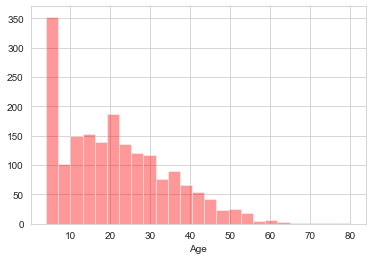

In [7]:
sns.distplot(autism_df['Age'], color = 'red', kde = False, bins = 25)

**Creating a jointplot showing Age versus Score.**

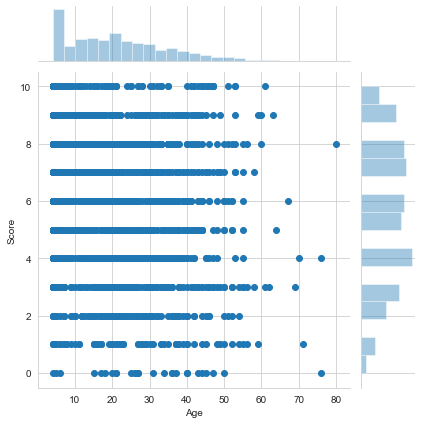

In [8]:
sns.jointplot(autism_df['Age'], autism_df['Score'])

**Creating a jointplot showing the kde distributions of Age vs. Score.**

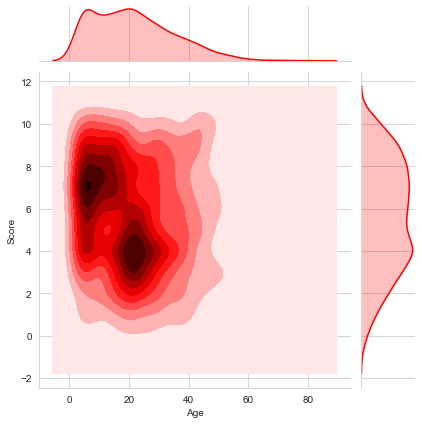

In [9]:
sns.jointplot(autism_df['Age'], autism_df['Score'], kind = 'kde', color = 'red')

**Creating a countplot showing of Class vs. Sex.**

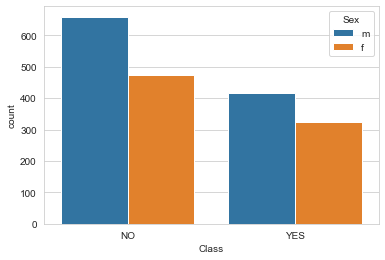

In [10]:
sns.countplot(x='Class', hue = 'Sex', data = autism_df)

**Creating a countplot showing of Class vs. Screen Type.**

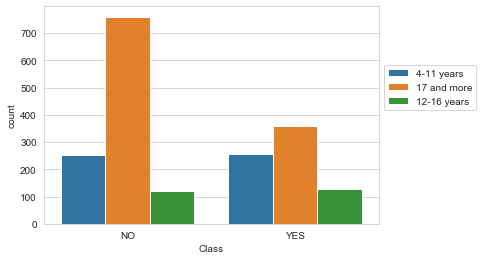

In [11]:
sns.countplot(x='Class', hue = 'Screening Type', data = autism_df)
plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

# Logistic Regression


**Splitting the data into training set and testing set using train_test_split**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
autism_df.head(3)

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,User,Class
0,1,0,1,1,0,0,1,1,0,0,...,m,middle eastern,yes,no,Libya,no,5,4-11 years,parent,NO
1,3,0,1,1,1,1,1,1,0,0,...,m,middle eastern,yes,no,Libya,yes,7,4-11 years,parent,YES
2,4,0,1,1,1,1,1,0,1,1,...,m,white,no,no,Russia,no,8,4-11 years,parent,YES


In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [16]:
ethnicities = pd.get_dummies(autism_df['Ethnicity'], drop_first=True)
jaundice = pd.get_dummies(autism_df['Jaundice '], drop_first=True)
jaundice.rename(columns = {'yes' : 'Jaundice-Yes'}, inplace = True)
male = pd.get_dummies(autism_df['Sex'], drop_first=True)
male.rename(columns = {'m' : 'Male'}, inplace = True)
family_asd = pd.get_dummies(autism_df['Family_ASD'], drop_first=True)
family_asd.rename(columns = {'yes' : 'FamilyASD-YES'}, inplace = True)
used_app = pd.get_dummies(autism_df['Used_App_Before'], drop_first=True)
used_app.rename(columns = {'yes' : 'UsedApp-YES'}, inplace = True)
screening_ages = pd.get_dummies(autism_df['Screening Type'], drop_first=True)
user =  pd.get_dummies(autism_df['User'], drop_first=True)
class_ASD = pd.get_dummies(autism_df['Class'], drop_first=True)
class_ASD.rename(columns = {'YES' : 'ASD-YES'}, inplace = True)
questions = autism_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]

In [17]:
final_dataset = pd.concat([questions, male, ethnicities, family_asd, used_app, screening_ages, user, class_ASD], axis = 1)

In [18]:
final_dataset.head(3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,UsedApp-YES,17 and more,4-11 years,health care professional,others,parent,relative,self,teacher,ASD-YES
0,0,1,1,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0,1,1,1,1,1,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
2,0,1,1,1,1,1,0,1,1,1,...,0,0,1,0,0,1,0,0,0,1


In [19]:
final_dataset.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Male',
       'asian', 'black', 'hispanic', 'latino', 'middle eastern', 'others ',
       'south asians', 'white', 'FamilyASD-YES', 'UsedApp-YES', '17 and more',
       '4-11 years', 'health care professional', 'others', 'parent',
       'relative', 'self', 'teacher', 'ASD-YES'],
      dtype='object')

In [24]:
X = final_dataset.drop('ASD-YES',axis=1)
y = final_dataset['ASD-YES']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=101)

**Training and fitting a logistic regression model on the training set.**

In [26]:
logm = LogisticRegression()

In [27]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 30 columns):
A1                          1875 non-null int64
A2                          1875 non-null int64
A3                          1875 non-null int64
A4                          1875 non-null int64
A5                          1875 non-null int64
A6                          1875 non-null int64
A7                          1875 non-null int64
A8                          1875 non-null int64
A9                          1875 non-null int64
A10                         1875 non-null int64
Male                        1875 non-null uint8
asian                       1875 non-null uint8
black                       1875 non-null uint8
hispanic                    1875 non-null uint8
latino                      1875 non-null uint8
middle eastern              1875 non-null uint8
others                      1875 non-null uint8
south asians                1875 non-null uint8
white                       1

In [28]:
logm.fit(X_train, y_train)

C:\Users\emreo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
**Now predicting values for the testing data.**

In [29]:
predictions = logm.predict(X_test)

**Creating a classification report for the model.**

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       340
           1       0.97      1.00      0.99       223

    accuracy                           0.99       563
   macro avg       0.99      0.99      0.99       563
weighted avg       0.99      0.99      0.99       563



In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9893428063943162


In [32]:
confusion_matrix(y_test, predictions)

array([[334,   6],
       [  0, 223]], dtype=int64)